In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(42)

# Loading The Dataset

In [332]:
iris = datasets.load_iris()


In [333]:
df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})

SHUFFLING DATA

In [334]:
df.sample(frac=1)

,x,y,cluster
73,6.1,2.8,1
18,5.7,3.8,0
118,7.7,2.6,2
78,6.0,2.9,1
76,6.8,2.8,1
...,...,...,...
71,6.1,2.8,1
106,4.9,2.5,2
14,5.8,4.0,0
92,5.8,2.6,1


# INITIALIZING CENTROIDS

In [335]:

centroids = {}
for i in range(3):
    
    centroids[i] = [df['x'][i],df['y'][i]]

In [336]:
centroids

{0: [5.1, 3.5], 1: [4.9, 3.0], 2: [4.7, 3.2]}

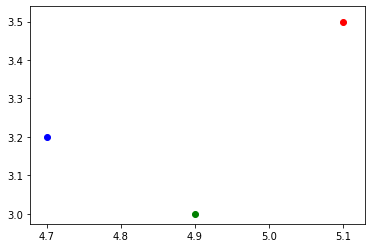

In [337]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

# ASSIGNING VALUES TO CLUSTERS

In [338]:
def assignment(df, centroids):
    
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
        
    scid=pd.DataFrame([df['distance_from_{}'.format(0)],df['distance_from_{}'.format(1)], df['distance_from_{}'.format(2)]]).min()
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]

    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
       
    return df,scid
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [339]:
df,scid = assignment(df, centroids)

INITIAL SSE VALUE

In [325]:
scid

0      0.000000
1      0.000000
2      0.000000
3      0.141421
4      0.141421
         ...   
145    1.676305
146    1.486607
147    1.486607
148    1.104536
149    0.943398
Length: 150, dtype: float64

In [308]:
scid.sum()

149.6238386558185

# RUNNING TILL CENTROIDS DO NOT CHANGE

In [309]:

ssear=[]
ssear.append(scid.sum())
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df,scid = assignment(df, centroids)
    ssear.append(scid.sum())
    if closest_centroids.equals(df['closest']):
        break

# FINAL CLUSTERS AND CENTROIDS

In [310]:
clusters=df['closest'].values

In [311]:
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [312]:
centroids

{0: [6.812765957446807, 3.074468085106383],
 1: [5.773584905660377, 2.692452830188679],
 2: [5.006, 3.428]}

# FINAL SCATTER PLOT SHOWING CLUSTERS

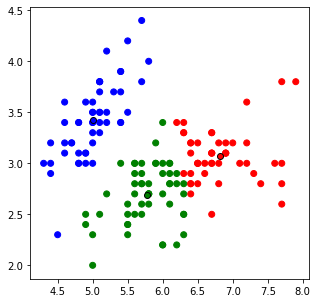

In [313]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'])
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()

## FINAL SCID VALUE

In [346]:
sse=scid.sum()

In [347]:
sse

62.76402512603062

In [276]:
ssear

[81.55540806042816,
 66.33266837479364,
 62.99803557136471,
 62.738104585638425,
 62.74129185480632,
 62.76402512603062]

# RUNNNG FOR 150 ITERATIONS

In [343]:
ssear1=[]
iterations = 150
for i in range(iterations):
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df,scid = assignment(df, centroids)
    ssear1.append(scid.sum())

CENTROIDS DO NOT CHANGE

In [327]:
centroids

{0: [6.812765957446807, 3.074468085106383],
 1: [5.773584905660377, 2.692452830188679],
 2: [5.006, 3.428]}

In [279]:
sse=scid.sum()

SSE DO NOT CHANGE

In [280]:
sse

62.76402512603062

In [295]:
ssear1


[81.55540806042816,
 66.33266837479364,
 62.99803557136471,
 62.738104585638425,
 62.74129185480632,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,
 62.76402512603062,

# PLOT BETWEEN SCID VALUES AND ITERATIONS

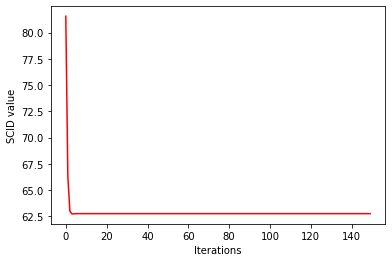

In [344]:
plt.xlabel("Iterations")
plt.ylabel("SCID value")
plt.plot(np.arange(iterations), ssear1, color = "red")
plt.show()

In [235]:
df['distance_from_{}'.format(0)]

0      0.118406
1      0.440931
2      0.381602
3      0.521939
4      0.172105
         ...   
145    1.747232
146    1.592363
147    1.554098
148    1.194328
149    0.991171
Name: distance_from_0, Length: 150, dtype: float64

In [237]:
df['distance_from_{}'.format(1)]

0      1.109863
1      1.061224
2      1.308662
3      1.376153
4      1.250998
         ...   
145    0.797870
146    0.453206
147    0.609094
148    0.683078
149    0.232800
Name: distance_from_1, Length: 150, dtype: float64

In [238]:
df['distance_from_{}'.format(2)]

0      1.578233
1      1.688200
2      1.901478
3      1.991989
4      1.706933
         ...   
145    0.114978
146    0.554635
147    0.091761
148    0.576212
149    0.688491
Name: distance_from_2, Length: 150, dtype: float64